#非表示

In [ ]:
# コーネル大学ワシントン校の緯度経度
cornell_latitude = 38.90893339479633
cornell_longitude = -77.04831166342584

# ハーフバーサイン公式で距離を計算する関数
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球の半径（単位: km）
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# データフレームに新しい列 distance を追加
train['distance'] = train.apply(lambda row: haversine(row['LATITUDE'], row['LONGITUDE'], cornell_latitude, cornell_longitude), axis=1)
test['distance'] = test.apply(lambda row: haversine(row['LATITUDE'], row['LONGITUDE'], cornell_latitude, cornell_longitude), axis=1)

#各ライブラリ読込

In [ ]:
# ライブラリのインストール（初回のみ）
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=775d6e2b9761b14d2fb721eb9be978106beecbba4d61fa47426390850a4dd40b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
# グラフをインラインで表示させる
%matplotlib inline

import numpy as np
import pandas as pd
import random

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math
from scipy import stats

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

#①データ読み込み～df結合

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/不動産講義/Property Price Prediction Challenge(kaggle)

/content/drive/MyDrive/不動産講義/Property Price Prediction Challenge(kaggle)


In [ ]:
df_train = pd.read_csv('./motodata/DC_train.csv')
df_test = pd.read_csv('./motodata/DC_test.csv')
df_census_tracts = pd.read_csv('./motodata/raw_census_tracts_in_2010.csv')

In [ ]:
#'CENSUS_TRACT'と'TRACT'をキーにして結合
train = pd.merge(df_train, df_census_tracts, how="left", left_on="CENSUS_TRACT", right_on="TRACT")
test = pd.merge(df_test, df_census_tracts, how="left", left_on="CENSUS_TRACT", right_on="TRACT")

In [ ]:
train['train'] = 1
test['train'] = 0

In [ ]:
merged_train_test = pd.concat([train, test])

# IDで昇順に並び替える
merged_train_test = merged_train_test.sort_values(by='Id')

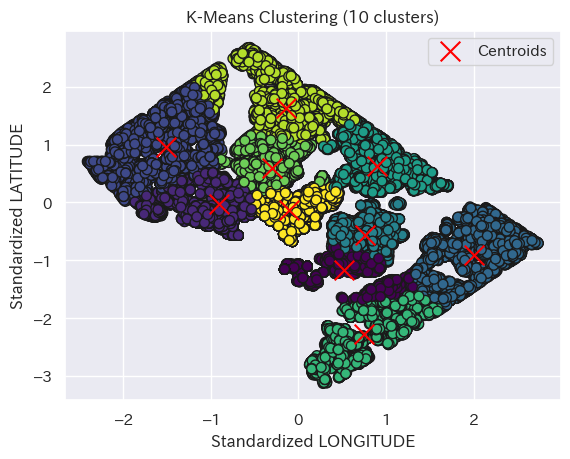

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import itertools

class KMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)

    def fit(self, X):
        cycle = itertools.cycle(range(self.n_clusters))
        self.labels_ = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype=int)
        self.random_state.shuffle(self.labels_)
        labels_prev = np.zeros(X.shape[0])
        count = 0
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))

        while (not (self.labels_ == labels_prev).all() and count < self.max_iter):
            for i in range(self.n_clusters):
                XX = X[self.labels_ == i, :]
                if XX.size > 0:
                    self.cluster_centers_[i, :] = XX.mean(axis=0)
            dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
            labels_prev = self.labels_
            self.labels_ = dist.argmin(axis=1)
            count += 1

    def predict(self, X):
        dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
        labels = dist.argmin(axis=1)
        return labels

# データセットを準備
X = merged_train_test[['LATITUDE', 'LONGITUDE']].values

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeansクラスタリング
kmeans = KMeans(n_clusters=10, max_iter=1000, random_seed=0)
kmeans.fit(X_scaled)

# 予測結果を取得
labels = kmeans.predict(X_scaled)

# クラスターごとに色を指定して散布図を描画
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=labels, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (10 clusters)')
plt.xlabel('Standardized LONGITUDE')
plt.ylabel('Standardized LATITUDE')
plt.legend()
plt.show()


In [ ]:
# KMeansクラスを使ってクラスタリングを実行（クラスタ数を20に設定）
kmeans = KMeans(n_clusters=15, max_iter=1000, random_seed=0)
kmeans.fit(X)

# 予測結果を取得
labels = kmeans.predict(X)

# 'KMEANS_LABELS'という新しいカラムをtrainデータフレームに追加
merged_train_test['KMEANS_LABELS'] = labels

In [ ]:
train = merged_train_test[merged_train_test['train'] == 1]
test = merged_train_test[merged_train_test['train'] == 0]
train = train.rename(columns = {'PRICE': 'y'})
test = test.rename(columns = {'PRICE': 'y'})

In [ ]:
train = train[(train['KITCHENS'] != 44) & (train['FIREPLACES'] != 1601) & (train['YR_RMDL'] != 20) & (train['Id'] != 51293)]

#データ型変更
#売却日　年月日→年月　表記に変えて、カラムを分ける
# SALEDATEを年月表記に変更
train['SALEDATE'] = pd.to_datetime(train['SALEDATE']).dt.strftime('%Y-%m')
# SALEDATEを年と月に分割してint型に変更
train['SALEDATE_y'] = pd.to_datetime(train['SALEDATE']).dt.year.astype(int)
train['SALEDATE_m'] = pd.to_datetime(train['SALEDATE']).dt.month.astype(str)
test['SALEDATE'] = pd.to_datetime(test['SALEDATE']).dt.strftime('%Y-%m')
# SALEDATEを年と月に分割してint型に変更
test['SALEDATE_y'] = pd.to_datetime(test['SALEDATE']).dt.year.astype(int)
test['SALEDATE_m'] = pd.to_datetime(train['SALEDATE']).dt.month.astype(str)

train = train[train['SALEDATE_y'] >= 2010]

def categorize_grade(grade):
    if grade in ['Above Average', 'Average', 'Low Quality', 'No Data', 'Fair Quality']:
        return 'C'
    elif grade in ['Superior', 'Very Good', 'Good Quality', 'Excellent']:
        return 'B'
    elif grade in ['Exceptional-A', 'Exceptional-B', 'Exceptional-C', 'Exceptional-D']:
        return 'A'
    else:
        return 'Unknown'

# GRADE_categoryカラムを作成
train['GRADE_cat'] = train['GRADE'].apply(categorize_grade)
test['GRADE_cat'] = test['GRADE'].apply(categorize_grade)



conditions = [
    (train['CNDTN'].isin(['Excellent', 'Very Good'])),
    (train['CNDTN'].isin(['Good', 'Average', 'Fair', 'Default']))
]

choices = ['A', 'B']

train['CNDTN_CATEGORY'] = np.select(conditions, choices, default='C')

conditions = [
    (test['CNDTN'].isin(['Excellent', 'Very Good'])),
    (test['CNDTN'].isin(['Good', 'Average', 'Fair', 'Default']))
]

choices = ['A', 'B']

test['CNDTN_CATEGORY'] = np.select(conditions, choices, default='C')

train = train[train['GRADE'] != 'No Data']

# トレーニングデータのGRADEに基づくカテゴリの追加
train['GRADE_CATEGORY'] = np.where(train['GRADE'].str.contains('Exceptional'), 'E', 'N')
# テストデータのGRADEに基づくカテゴリの追加
test['GRADE_CATEGORY'] = np.where(test['GRADE'].str.contains('Exceptional'), 'E', 'N')

train['STYLE'] = train['STYLE'].replace(['Default', 'Outbuildings', 'Split Foyer', 'Split Level', 'Vacant'], "1 Story")
test['STYLE'] = test['STYLE'].replace(['Default', 'Outbuildings', 'Split Foyer', 'Split Level', 'Vacant'], "1 Story")
train['STYLE_NUM'] = train['STYLE'].str.split().str[0]
test['STYLE_NUM'] = test['STYLE'].str.split().str[0]
# STORIESが5以上の場合、欠損値に変更
train.loc[train['STORIES'] >= 5, 'STORIES'] = None
test.loc[test['STORIES'] >= 5, 'STORIES'] = None
train['STORIES'].fillna(train['STYLE_NUM'], inplace=True)
test['STORIES'].fillna(test['STYLE_NUM'], inplace=True)
train['STORIES'] = train['STORIES'].astype(float)
test['STORIES'] = test['STORIES'].astype(float)
train['mezzanine'] = train['STORIES'].apply(lambda x: 'm5' if x % 1 == 0.5 else 'm7' if x % 1 == 0.7 else 'n' if x == 0 else 'm')
test['mezzanine'] = test['STORIES'].apply(lambda x: 'm5' if x % 1 == 0.5 else 'm7' if x % 1 == 0.7 else 'n' if x == 0 else 'm')
train['STORIES'] = train['STORIES'].round()
test['STORIES'] = test['STORIES'].round()
train['STORIES'] = train['STORIES'].astype(str)
test['STORIES'] = test['STORIES'].astype(str)

train['YR_RMDL2'] = train['YR_RMDL'].isna().astype(int)
test['YR_RMDL2'] = test['YR_RMDL'].isna().astype(int)

train['AYB'] = train['AYB'].fillna(train['YR_RMDL'])
test['AYB'] = test['AYB'].fillna(test['YR_RMDL'])

train['AYB'] = train['AYB'].fillna(train['EYB'])
test['AYB'] = test['AYB'].fillna(test['EYB'])

train['YR_RMDL'] = train['YR_RMDL'].fillna(train['AYB'])
test['YR_RMDL'] = test['YR_RMDL'].fillna(test['AYB'])


train['OLDS'] = train['SALEDATE_y'] - train['AYB']
test['OLDS'] = test['SALEDATE_y'] - test['AYB']

train['OLDS2'] = train['SALEDATE_y'] - train['EYB']
test['OLDS2'] = test['SALEDATE_y'] - test['EYB']

train['OLDS3'] = train['SALEDATE_y'] - train['YR_RMDL']
test['OLDS3'] = test['SALEDATE_y'] - test['YR_RMDL']

train['EXTWALL_group'] = train['EXTWALL'].apply(lambda x: 'B/S' if isinstance(x, str) and ('Brick' in x or 'Stone' in x) else 'Other')

test['EXTWALL_group'] = test['EXTWALL'].apply(lambda x: 'B/S' if isinstance(x, str) and ('Brick' in x or 'Stone' in x) else 'Other')

train['築年数'] = train['SALEDATE_y'] - train['EYB']
test['築年数'] = test['SALEDATE_y'] - test['EYB']

train['残存法定耐用年数'] = 27.5 - train['SALEDATE_y'] - train['EYB']
test['残存法定耐用年数'] = 27.5 - test['SALEDATE_y'] - test['EYB']

train['OLDS3'] = train['SALEDATE_y'] - train['YR_RMDL']
test['OLDS3'] = test['SALEDATE_y'] - test['YR_RMDL']

train['EXTWALL_group'] = train['EXTWALL'].apply(lambda x: 'B/S' if isinstance(x, str) and ('Brick' in x or 'Stone' in x) else 'Other')

test['EXTWALL_group'] = test['EXTWALL'].apply(lambda x: 'B/S' if isinstance(x, str) and ('Brick' in x or 'Stone' in x) else 'Other')

train['ROOFRANK'] = train['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

test['ROOFRANK'] = test['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

train['INTWALLRANK'] = train['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

test['INTWALLRANK'] = test['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

# HEATRANKカラムを追加
train['HEATRANK'] = train['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

test['HEATRANK'] = test['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

train['BATHRM'] = train['BATHRM'] + (train['HF_BATHRM'] / 2)
test['BATHRM'] = test['BATHRM'] + (test['HF_BATHRM'] / 2)

train['AC'] = train['AC'].apply(lambda x: 'N' if x == 0 else x)
test['AC'] = test['AC'].apply(lambda x: 'N' if x == 0 else x)

train['ROADRANK'] = train['ASSESSMENT_SUBNBHD'].str[4].fillna('N')
test['ROADRANK'] = test['ASSESSMENT_SUBNBHD'].str[4].fillna('N')

train['家対人口数'] = train['H0010001'] / train['P0010001']
test['家対人口数'] = test['H0010001'] / test['P0010001']

train['HEATRANK_C'] = (train['HEAT'] == 'Air-Oil').astype(int)
test['HEATRANK_C'] = (test['HEAT'] == 'Air-Oil').astype(int)

train['ASSESSMENT_SUBNBHD'] = train['ASSESSMENT_SUBNBHD'].fillna(train['ASSESSMENT_NBHD'])
test['ASSESSMENT_SUBNBHD'] = test['ASSESSMENT_SUBNBHD'].fillna(test['ASSESSMENT_NBHD'])

# 現在の西暦年を取得
current_year = datetime.now().year

# 推測時点築年数の計算
train['推測時点築年数'] = current_year - train['EYB']
test['推測時点築年数'] = current_year - test['EYB']

train = train.rename(columns={'INTERESTRATE': '販売時点金利'})
test = test.rename(columns={'INTERESTRATE': '販売時点金利'})

##販売年で影響による誤学習を避けるため、2010年以上のみ学習

In [ ]:
train = train[train['SALEDATE_y'] >= 2010]

###CNDTNをExcellent or Very Goodかそれ以外かで2値化

In [ ]:
conditions = [
    (train['CNDTN'].isin(['Excellent', 'Very Good'])),
    (train['CNDTN'].isin(['Good', 'Average', 'Fair', 'Default']))
]

choices = ['A', 'B']

train['CNDTN_CATEGORY'] = np.select(conditions, choices, default='C')

conditions = [
    (test['CNDTN'].isin(['Excellent', 'Very Good'])),
    (test['CNDTN'].isin(['Good', 'Average', 'Fair', 'Default']))
]

choices = ['A', 'B']

test['CNDTN_CATEGORY'] = np.select(conditions, choices, default='C')

In [ ]:
# CNDTNの順序を指定
cndtn_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Fair', 'Poor', 'Default']

# CNDTNの列を指定の順序でソート
train['CNDTN'] = pd.Categorical(train['CNDTN'], categories=cndtn_order, ordered=True)

# ZIPCODEごとのCNDTNごとの'y'列の中央値を計算
train.groupby(['ASSESSMENT_NBHD', 'CNDTN'])['y'].median()

###GRADEはNo Dataのデータを削除して、Excetipnalを含むかどうかで2値化

In [ ]:
# 条件に基づいてGRADEをEまたはNに分類する新しいカラムを追加
conditions = [
    (train['GRADE'].str.contains('Exceptional')),
]

choices = ['E']

train['GRADE_CATEGORY'] = np.select(conditions, choices, default='N')

# 条件に基づいてGRADEをEまたはNに分類する新しいカラムを追加
conditions = [
    (test['GRADE'].str.contains('Exceptional')),
]

choices = ['E']

test['GRADE_CATEGORY'] = np.select(conditions, choices, default='N')

train = train[train['GRADE'] != 'No Data']

In [ ]:
train = train[train['GRADE'] != 'No Data']

In [ ]:
# GRADEが"No Data"の件数を取得
no_data_count = (train['GRADE'] == 'No Data').sum()

# 結果を表示
print("GRADEが 'No Data' の件数:", no_data_count)

GRADEが 'No Data' の件数: 0


In [ ]:
# GRADEの順序を指定

grade_order = [
    'Exceptional-D', 'Exceptional-C', 'Exceptional-B', 'Exceptional-A',
    'Excellent', 'Superior', 'Very Good', 'Above Average',
    'Average', 'Good Quality', 'Fair Quality', 'Low Quality', 'No Data'
]

# GRADEの列を指定の順序でソート
train['GRADE'] = pd.Categorical(train['GRADE'], categories=grade_order, ordered=True)

# ZIPCODEごとのGRADEごとの'y'列の中央値を計算
train.groupby(['ASSESSMENT_NBHD', 'GRADE'])['y'].median()


###STORIESの欠損は、STYLEの情報で埋める  
中二階を含むかどうかを判別させる

In [ ]:
train['STYLE_NUM'] = train['STYLE'].str.split().str[0]
test['STYLE_NUM'] = test['STYLE'].str.split().str[0]
train['STORIES'].fillna(train['STYLE_NUM'], inplace=True)
test['STORIES'].fillna(test['STYLE_NUM'], inplace=True)
train['STORIES'] = train['STORIES'].astype(float)
test['STORIES'] = test['STORIES'].astype(float)
train['mezzanine'] = train['STORIES'].apply(lambda x: 'm5' if x % 1 == 0.5 else 'm2' if x % 1 == 0.7 else 'n' if x == 0 else 'm')
test['mezzanine'] = test['STORIES'].apply(lambda x: 'm5' if x % 1 == 0.5 else 'm2' if x % 1 == 0.7 else 'n' if x == 0 else 'm')

###YR_RMDLはあり

In [ ]:
train['YR_RMDL2'] = train['YR_RMDL'].isna().astype(int)
test['YR_RMDL2'] = test['YR_RMDL'].isna().astype(int)

In [ ]:
train['AYB'] = train['AYB'].fillna(train['YR_RMDL'])
test['AYB'] = test['AYB'].fillna(test['YR_RMDL'])

In [ ]:
train['AYB'] = train['AYB'].fillna(train['EYB'])
test['AYB'] = test['AYB'].fillna(test['EYB'])

In [ ]:
train['YR_RMDL'] = train['YR_RMDL'].fillna(train['AYB'])
test['YR_RMDL'] = test['YR_RMDL'].fillna(test['AYB'])

In [ ]:
train['OLDS'] = train['SALEDATE_y'] - train['AYB']
test['OLDS'] = test['SALEDATE_y'] - test['AYB']

In [ ]:
train['OLDS2'] = train['SALEDATE_y'] - train['EYB']
test['OLDS2'] = test['SALEDATE_y'] - test['EYB']

In [ ]:
median_y_by_extwall = train.groupby(train['EXTWALL'].isin(['Brick', 'Stone']))['y'].median()

# 結果を表示
print(median_y_by_extwall)

In [ ]:
train['EXTWALL_group'] = train['EXTWALL'].apply(lambda x: 'B/S' if isinstance(x, str) and ('Brick' in x or 'Stone' in x) else 'Other')

In [ ]:
train.groupby(['ASSESSMENT_NBHD', 'USECODE'])['y'].median()

In [ ]:
# ZIPCODEごとのCNDTNごとの'y'列の中央値を計算
train.groupby(['ASSESSMENT_NBHD', 'ROOFRANK'])['y'].median()

In [ ]:
train['ROOFRANK'] = train['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

test['ROOFRANK'] = test['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

train['INTWALLRANK'] = train['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

test['INTWALLRANK'] = test['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

# HEATRANKカラムを追加
train['HEATRANK'] = train['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

test['HEATRANK'] = test['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

train['BATHRM'] = train['BATHRM'] + (train['HF_BATHRM'] / 2)
test['BATHRM'] = test['BATHRM'] + (test['HF_BATHRM'] / 2)

train['AC'] = train['AC'].apply(lambda x: 'N' if x == 0 else x)
test['AC'] = test['AC'].apply(lambda x: 'N' if x == 0 else x)

In [ ]:
train['ROOFRANK'] = train['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

test['ROOFRANK'] = test['ROOF'].apply(lambda x: '木造' if x in ["Shake", "Wood- FS"]else
                                               '鉄骨' if x in ["Metal- Cpr", "Metal- Pre", "Metal- Sms"] else
                                               '鉄筋' if x in ["Concrete", "Concrete Tile"] else
                                               'レンガ' if x in ["Clay Tile", "Composition Ro", "Slate"] else
                                               'その他')

In [ ]:
train['INTWALLRANK'] = train['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

test['INTWALLRANK'] = test['INTWALL'].apply(lambda x: '木造' if x in ["Hardwood", "Hardwood/Carp", "Parquet", "Wood Floor"] else
                                               '鉄骨' if x in ["Ceramic Tile", "Terrazo"] else
                                               '鉄筋' if x in ["Lt Concrete"] else
                                               'レンガ' if x in ["Carpet", "Resiliant", "Vinyl Comp", "Vinyl Sheet"] else
                                               'その他')

In [ ]:
# HEATRANKカラムを追加
train['HEATRANK'] = train['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

test['HEATRANK'] = test['HEAT'].apply(
    lambda x: 'C' if x in ['Water Base Brd', 'Wall Furnace', 'Electric Rad', 'Ind Unit', 'No Data', 'Elec Base Brd', 'Evp Cool'] else
              'B' if x in ['Warm Cool', 'Air Exchng', 'Hot Water Rad', 'Gravity Furnac', 'Forced Air', 'Ht Pump'] else
              'A'
)

In [ ]:
train['BATHRM'] = train['BATHRM'] + (train['HF_BATHRM'] / 2)
test['BATHRM'] = test['BATHRM'] + (test['HF_BATHRM'] / 2)

train['AC'] = train['AC'].apply(lambda x: 'N' if x == 0 else x)
test['AC'] = test['AC'].apply(lambda x: 'N' if x == 0 else x)

##データ型変更

In [ ]:
train['SALE_NUM'] = train['SALE_NUM'].astype(str)
test['SALE_NUM'] = test['SALE_NUM'].astype(str)
train['BLDG_NUM'] = train['BLDG_NUM'].astype(str)
test['BLDG_NUM'] = test['BLDG_NUM'].astype(str)
train['USECODE'] = train['USECODE'].astype(str)
test['USECODE'] = test['USECODE'].astype(str)
train['CMPLX_NUM'] = train['CMPLX_NUM'].astype(str)
test['CMPLX_NUM'] = test['CMPLX_NUM'].astype(str)
train['ZIPCODE'] = train['ZIPCODE'].astype(str)
test['ZIPCODE'] = test['ZIPCODE'].astype(str)
train['CENSUS_TRACT'] = train['CENSUS_TRACT'].astype(str)
test['CENSUS_TRACT'] = test['CENSUS_TRACT'].astype(str)
train['KMEANS_LABELS'] = train['KMEANS_LABELS'].astype(str)
test['KMEANS_LABELS'] = test['KMEANS_LABELS'].astype(str)

In [ ]:
train['log_GBA'] = np.log1p(train['GBA'])
test['log_GBA'] = np.log1p(test['GBA'])

In [ ]:
# SOURCEカラムがResidentialの行を抽出
trainR = train[train['SOURCE'] == 'Residential']
# SOURCEカラムがResidential以外の行を抽出
trainC = train[train['SOURCE'] != 'Residential']
# SOURCEカラムがResidentialの行を抽出
testR = test[test['SOURCE'] == 'Residential']
# SOURCEカラムがResidential以外の行を抽出
testC = test[test['SOURCE'] != 'Residential']

In [ ]:
trainR = trainR[["y", "KMEANS_LABELS", "ROADRANK", "HEATRANK", "BATHRM", "ROOMS", "BEDRM", "QUALIFIED", "log_GBA", "mezzanine", "STORIES", "CNDTN", "GRADE", "KITCHENS", "FIREPLACES", "AYB", "EYB", "OLDS", "OLDS2", "SALEDATE_m", "YR_RMDL2", "OLDS3", "LANDAREA"]]
testR = testR[["KMEANS_LABELS", "ROADRANK", "HEATRANK", "BATHRM", "ROOMS", "BEDRM", "QUALIFIED", "log_GBA", "mezzanine", "STORIES", "CNDTN", "GRADE", "KITCHENS", "FIREPLACES", "AYB", "EYB", "OLDS", "OLDS2", "SALEDATE_m", "YR_RMDL2", "OLDS3", "LANDAREA"]]

In [ ]:
trainC = trainC[["y", "ROADRANK", "HEATRANK", "BATHRM", "ROOMS", "BEDRM", "AYB", "EYB", "OLDS", "OLDS2", "OLDS3", "SALEDATE_m", "YR_RMDL2", "USECODE", "LIVING_GBA"]]
testC = testC[["ROADRANK", "HEATRANK", "BATHRM", "ROOMS", "BEDRM", "AYB", "EYB", "OLDS", "OLDS2", "OLDS3", "SALEDATE_m", "YR_RMDL2", "USECODE", "LIVING_GBA"]]

In [ ]:
testR['KITCHENS'].fillna(testR['KITCHENS'].median(), inplace=True)
trainR['KITCHENS'] = trainR['KITCHENS'].astype(int)
testR['KITCHENS'] = testR['KITCHENS'].astype(int)
trainR['AYB'] = trainR['AYB'].astype(int)
testR['AYB'] = testR['AYB'].astype(int)
trainR['OLDS'] = trainR['OLDS'].astype(int)
testR['OLDS'] = testR['OLDS'].astype(int)
trainR['OLDS3'] = trainR['OLDS3'].astype(int)
testR['OLDS3'] = testR['OLDS3'].astype(int)
trainR['LANDAREA'] = trainR['LANDAREA'].astype(float)
testR['LANDAREA'] = testR['LANDAREA'].astype(float)
trainR['YR_RMDL2'] = trainR['YR_RMDL2'].astype(str)
testR['YR_RMDL2'] = testR['YR_RMDL2'].astype(str)

In [ ]:
trainR.dtypes

y                   float64
KMEANS_LABELS        object
ROADRANK             object
BATHRM              float64
ROOMS                 int64
BEDRM                 int64
QUALIFIED            object
GBA                 float64
mezzanine            object
STORIES              object
CNDTN                object
GRADE                object
KITCHENS              int64
FIREPLACES            int64
AYB                   int64
EYB                   int64
OLDS                  int64
OLDS2                 int64
SALEDATE_m           object
YR_RMDL2             object
OLDS3                 int64
LANDAREA            float64
CENSUS_TRACT         object
空き家人口対比             float64
P0010003              int64
P0010004              int64
FAGI_MEDIAN_2015    float64
FAGI_MEDIAN_2014    float64
FAGI_MEDIAN_2013    float64
FAGI_MEDIAN_2012    float64
FAGI_MEDIAN_2011    float64
FAGI_MEDIAN_2010    float64
dtype: object

In [ ]:
testR.isnull().sum()

KMEANS_LABELS    0
ROADRANK         0
BATHRM           0
ROOMS            0
BEDRM            0
QUALIFIED        0
GBA              0
mezzanine        0
STORIES          0
CNDTN            0
GRADE            0
KITCHENS         1
FIREPLACES       0
AYB              0
EYB              0
OLDS             0
OLDS2            0
SALEDATE_m       0
YR_RMDL2         0
OLDS3            0
LANDAREA         0
CENSUS_TRACT     0
dtype: int64

In [ ]:
trainC.isnull().sum()

y                0
KMEANS_LABELS    0
ROADRANK         0
HEATRANK         0
BATHRM           0
ROOMS            0
BEDRM            0
QUALIFIED        0
AYB              0
EYB              0
OLDS             0
OLDS2            0
SALEDATE_m       0
YR_RMDL2         0
USECODE          0
FIREPLACES       0
LIVING_GBA       0
dtype: int64

In [ ]:
testC.isnull().sum()

KMEANS_LABELS    0
ROADRANK         0
HEATRANK         0
BATHRM           0
ROOMS            0
BEDRM            0
QUALIFIED        0
AYB              0
EYB              0
OLDS             0
OLDS2            0
SALEDATE_m       0
YR_RMDL2         0
FIREPLACES       0
USECODE          0
LIVING_GBA       0
dtype: int64

In [ ]:
trainC.isnull().sum()

#ここまで

##②データの加工

In [ ]:
from sklearn.model_selection import train_test_split

X = trainC.drop(columns=['y'])
y = trainC['y']

# ランダムに3割を検証用としてサンプリングする
train_train, train_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=4)

In [ ]:
# "object"型の列を抽出
object_columns = trainC.select_dtypes(include='object')

# 列の名前を表示
object_column_names = object_columns.columns
print(object_column_names)

Index(['ROADRANK', 'HEATRANK', 'SALEDATE_m', 'USECODE'], dtype='object')


In [ ]:
# "object"型の列を抽出
object_columns = testC.select_dtypes(include='object')

# 列の名前を表示
object_column_names = object_columns.columns
print(object_column_names)

Index(['ROADRANK', 'HEATRANK', 'SALEDATE_m', 'USECODE'], dtype='object')


In [ ]:
# 'STORIES', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD_x' の各カラムのユニークな値を取得し、ソート
categories_USECODE = train_train['USECODE'].unique()

In [ ]:
# 学習用データ(train_train)から、capaとhomeの2変数でモデルを作る

# 説明変数に使う変数の抽出
X_train = train_train.copy()

# 各列をカテゴリカルデータに変換
# 各列に対してpd.Categoricalを適用
X_train["ROADRANK"] = pd.Categorical(X_train["ROADRANK"], categories=categories_ROADRANK)
X_train["HEATRANK"] = pd.Categorical(X_train["HEATRANK"], categories=categories_HEATRANK)
X_train["SALEDATE_m"] = pd.Categorical(X_train["SALEDATE_m"], categories=categories_SALEDATE_m)
X_train["USECODE"] = pd.Categorical(X_train["USECODE"], categories=categories_USECODE)
# ワンホットエンコーディング
X_train = pd.get_dummies(X_train, drop_first=True)
# 定数項の付与
X_train = sm.add_constant(X_train)

# モデルの学習
result1 = sm. OLS(y_train, X_train).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     168.2
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:28:39   Log-Likelihood:            -1.5470e+05
No. Observations:               10969   AIC:                         3.095e+05
Df Residuals:                   10930   BIC:                         3.098e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.973e+07   3.28e+06     -6.009      0.000   -2.62e+07   -1.33e+07
BATHRM         3.526e+04   8744.333      4.032      0.000    1.81e+04    5.24e+04
ROOMS         -2.745e+04   5686.030     -4.827      0.000   -3.86e+04   -1.63e+04
BEDRM         -2.493e+04   8127.783     -3.067      0.002   -4.09e+04   -8994.964
AYB            4845.5813    826.466      5.863      0.000    3225.558    6465.605
EYB            4973.3917    821.697      6.053      0.000    3362.717    6584.067
OLDS           5303.1998    821.966      6.452      0.000    3691.998    6914.401
OLDS2          5175.3894    827.895      6.251      0.000    3552.565    6798.214
OLDS3         -1912.4306    183.660    -10.413      0.000   -2272.438   -1552.424
YR_RMDL2       9.086e+04   9584.988      9.479      0.000    7.21e+04     1.1e+05
LIVING_GBA      532.8873     13.990     38.091      0.000     505.464     560.310
ROADRANK_B    -6.209e+04   1.13e+04     -5.489      0.000   -8.43e+04   -3.99e+04
ROADRANK_A    -4.399e+04   1.23e+04     -3.589      0.000    -6.8e+04      -2e+04
ROADRANK_D     2.042e+04   1.33e+04      1.533      0.125   -5685.825    4.65e+04
ROADRANK_G    -5.486e+04    3.3e+04     -1.665      0.096   -1.19e+05    9741.682
ROADRANK_F     3.626e+04   1.75e+04      2.073      0.038    1965.388    7.06e+04
ROADRANK_E     1.572e+04   1.33e+04      1.184      0.236   -1.03e+04    4.17e+04
ROADRANK_H    -9.931e+04   3.21e+04     -3.091      0.002   -1.62e+05   -3.63e+04
ROADRANK_N     6.162e+04   1.06e+04      5.798      0.000    4.08e+04    8.25e+04
ROADRANK_I     4.273e+05   3.25e+04     13.130      0.000    3.64e+05    4.91e+05
ROADRANK_J    -2.013e+04   3.75e+04     -0.537      0.591   -9.36e+04    5.33e+04
ROADRANK_K    -1.485e+04    3.4e+04     -0.436      0.662   -8.15e+04    5.18e+04
ROADRANK_L    -9.182e+04   4.45e+04     -2.062      0.039   -1.79e+05   -4514.870
ROADRANK_M     -3.52e+04   7.69e+04     -0.457      0.647   -1.86e+05    1.16e+05
HEATRANK_C    -7.335e+04   1.89e+04     -3.876      0.000    -1.1e+05   -3.63e+04
HEATRANK_A     1.826e+06   8.17e+04     22.356      0.000    1.67e+06    1.99e+06
SALEDATE_m_7  -8829.2292   1.43e+04     -0.617      0.537   -3.69e+04    1.92e+04
SALEDATE_m_10  -2.09e+04   1.48e+04     -1.414      0.157   -4.99e+04    8073.636
SALEDATE_m_3  -2.204e+04   1.53e+04     -1.439      0.150   -5.21e+04    7977.409
SALEDATE_m_6  -1.442e+04   1.44e+04     -1.003      0.316   -4.26e+04    1.37e+04
SALEDATE_m_11 -1.232e+04   1.53e+04     -0.807      0.420   -4.23e+04    1.76e+04
SALEDATE_m_5   8.948e+04   1.44e+04      6.224      0.000    6.13e+04    1.18e+05
SALEDATE_m_4   2.787e+04   1.49e+04      1.876      0.061   -1252.174     5.7e+04
SALEDATE_m_8  -6180.7281   1.48e+04     -0.419      0.675   -3.51e+04    2.28e+04
SALEDATE_m_1   8.768e+04   1.64e+04      5.362   

In [ ]:
# RMSEを計算するパッケージ

from sklearn.metrics import mean_squared_error
#学習用データのRMSE

y_pred_train = result1.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

# # デフォルトだと二乗されたまま（squared=False）
#mean_squared_error(y_train, y_pred_train)

322748.91473648534

In [ ]:
# 検証用データのRMSE

# 説明変数に使う変数の抽出
X_valid = train_valid.copy()
# 'WARD_x' カラムのカテゴリカルバージョンを作成
X_valid["ROADRANK"] = pd.Categorical(X_valid["ROADRANK"], categories=categories_ROADRANK)
X_valid["HEATRANK"] = pd.Categorical(X_valid["HEATRANK"], categories=categories_HEATRANK)
X_valid["SALEDATE_m"] = pd.Categorical(X_valid["SALEDATE_m"], categories=categories_SALEDATE_m)
X_valid["USECODE"] = pd.Categorical(X_valid["USECODE"], categories=categories_USECODE)

# ワンホットエンコーディング
X_valid = pd.get_dummies(X_valid, drop_first=True)

# 定数項の付与
X_valid = sm.add_constant(X_valid)

# 予測結果、y_pred
y_pred_valid = result1.predict(X_valid)

mean_squared_error(y_valid, y_pred_valid, squared=False)

308582.0023090908

In [ ]:
X_test = testC.copy()

X_test["USECODE"] = pd.Categorical(X_test["USECODE"], categories=categories_USECODE)
X_test["CENSUS_TRACT"] = pd.Categorical(X_test["CENSUS_TRACT"], categories=categories_CENSUS_TRACT)
X_test["ASSESSMENT_NBHD"] = pd.Categorical(X_test["ASSESSMENT_NBHD"], categories=categories_ASSESSMENT_NBHD)
# ワンホットエンコーディング
X_test = pd.get_dummies(X_test, drop_first=True)

# 定数項の付与
X_test = sm.add_constant(X_test, has_constant='add')
pred = result1.predict(X_test)

In [ ]:
submit2 = df_test[['Id']].copy()
submit2['PRICE'] = pred

##ここまで

In [ ]:
from sklearn.model_selection import train_test_split

X = trainR.drop(columns=['y'])
y = trainR['y']

# ランダムに3割を検証用としてサンプリングする
train_train, train_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=4)

In [ ]:
train_train.shape, train_valid.shape, y_train.shape, y_valid.shape

((15798, 22), (6772, 22), (15798,), (6772,))

In [ ]:
# "object"型の列を抽出
object_columns = trainR.select_dtypes(include='object')

# 列の名前を表示
object_column_names = object_columns.columns
print(object_column_names)

Index(['KMEANS_LABELS', 'ROADRANK', 'HEATRANK', 'QUALIFIED', 'mezzanine',
       'STORIES', 'CNDTN', 'GRADE', 'SALEDATE_m', 'YR_RMDL2'],
      dtype='object')


In [ ]:
# 'STORIES', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD_x' の各カラムのユニークな値を取得し、ソート
categories_KMEANS_LABELS = train_train['KMEANS_LABELS'].unique()
categories_ROADRANK = train_train['ROADRANK'].unique()
categories_HEATRANK = train_train['HEATRANK'].unique()
categories_QUALIFIED = train_train['QUALIFIED'].unique()
categories_mezzanine = train_train['mezzanine'].unique()
categories_STORIES = train_train['STORIES'].unique()
categories_CNDTN = train_train['CNDTN'].unique()
categories_GRADE = train_train['GRADE'].unique()
categories_SALEDATE_m = train_train['SALEDATE_m'].unique()
categories_YR_RMDL2 = train_train['YR_RMDL2'].unique()

In [ ]:
# 学習用データ(train_train)から、capaとhomeの2変数でモデルを作る

# 説明変数に使う変数の抽出
X_train = train_train.copy()

# 各列をカテゴリカルデータに変換
X_train["KMEANS_LABELS"] = pd.Categorical(X_train["KMEANS_LABELS"], categories=categories_KMEANS_LABELS)
X_train["ROADRANK"] = pd.Categorical(X_train["ROADRANK"], categories=categories_ROADRANK)
X_train["HEATRANK"] = pd.Categorical(X_train["HEATRANK"], categories=categories_HEATRANK)
X_train["QUALIFIED"] = pd.Categorical(X_train["QUALIFIED"], categories=categories_QUALIFIED)
X_train["mezzanine"] = pd.Categorical(X_train["mezzanine"], categories=categories_mezzanine)
X_train["STORIES"] = pd.Categorical(X_train["STORIES"], categories=categories_STORIES)
X_train["CNDTN"] = pd.Categorical(X_train["CNDTN"], categories=categories_CNDTN)
X_train["GRADE"] = pd.Categorical(X_train["GRADE"], categories=categories_GRADE)
X_train["SALEDATE_m"] = pd.Categorical(X_train["SALEDATE_m"], categories=categories_SALEDATE_m)
X_train["YR_RMDL2"] = pd.Categorical(X_train["YR_RMDL2"], categories=categories_YR_RMDL2)

# ワンホットエンコーディング
X_train = pd.get_dummies(X_train, drop_first=True)
# 定数項の付与
X_train = sm.add_constant(X_train)

# モデルの学習
result1 = sm. OLS(y_train, X_train).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     567.6
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:14:13   Log-Likelihood:            -2.2246e+05
No. Observations:               15798   AIC:                         4.451e+05
Df Residuals:                   15707   BIC:                         4.458e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.245e+06   8.82e+04    -14.108      0.000   -1.42e+06   -1.07e+06
BATHRM                6.81e+04   4003.241     17.011      0.000    6.03e+04    7.59e+04
ROOMS                3603.8329   1895.480      1.901      0.057    -111.525    7319.191
BEDRM               -3090.0415   3521.435     -0.877      0.380   -9992.459    3812.377
log_GBA              1.468e+05   1.32e+04     11.115      0.000    1.21e+05    1.73e+05
KITCHENS             -1.87e+04   5543.938     -3.373      0.001   -2.96e+04   -7831.966
FIREPLACES           5.441e+04   3776.813     14.405      0.000     4.7e+04    6.18e+04
OLDS                 1970.0756    180.369     10.922      0.000    1616.531    2323.620
OLDS2               -1149.1389    365.084     -3.148      0.002   -1864.745    -433.533
OLDS3                 772.0376    213.922      3.609      0.000     352.725    1191.350
LANDAREA               52.0330      1.167     44.604      0.000      49.746      54.320
KMEANS_LABELS_28     1.021e+05   1.76e+04      5.798      0.000    6.76e+04    1.37e+05
KMEANS_LABELS_22      1.85e+05   1.91e+04      9.674      0.000    1.48e+05    2.23e+05
KMEANS_LABELS_2      6.067e+05   3.27e+04     18.549      0.000    5.43e+05    6.71e+05
KMEANS_LABELS_5      2.138e+04    2.5e+04      0.856      0.392   -2.76e+04    7.03e+04
KMEANS_LABELS_14     2.826e+05    1.9e+04     14.881      0.000    2.45e+05     3.2e+05
KMEANS_LABELS_8      2.767e+05    1.9e+04     14.572      0.000    2.39e+05    3.14e+05
KMEANS_LABELS_10      6.28e+05   2.65e+04     23.707      0.000    5.76e+05     6.8e+05
KMEANS_LABELS_15     1.008e+05      2e+04      5.040      0.000    6.16e+04     1.4e+05
KMEANS_LABELS_4      2.586e+05   1.99e+04     13.024      0.000     2.2e+05    2.98e+05
KMEANS_LABELS_24     1.989e+05   1.96e+04     10.130      0.000     1.6e+05    2.37e+05
KMEANS_LABELS_12     3.424e+05   1.96e+04     17.443      0.000    3.04e+05    3.81e+05
KMEANS_LABELS_13    -3.687e+04   1.61e+04     -2.294      0.022   -6.84e+04   -5367.658
KMEANS_LABELS_7       1.04e+05   1.82e+04      5.719      0.000    6.84e+04     1.4e+05
KMEANS_LABELS_29    -4.627e+04   2.09e+04     -2.217      0.027   -8.72e+04   -5364.118
KMEANS_LABELS_0      2.054e+05   2.89e+04      7.097      0.000    1.49e+05    2.62e+05
KMEANS_LABELS_11    -5.779e+04   1.77e+04     -3.273      0.001   -9.24e+04   -2.32e+04
KMEANS_LABELS_23     4.281e+05   2.03e+04     21.132      0.000    3.88e+05    4.68e+05
KMEANS_LABELS_9      4.509e+04   2.01e+04      2.238      0.025    5595.575    8.46e+04
KMEANS_LABELS_1      5.025e+05   2.36e+04     21.275      0.000    4.56e+05    5.49e+05
KMEANS_LABELS_6     -6.027e+04   2.02e+04     -2.982      0.003   -9.99e+04   -2.06e+04
KMEANS_LABELS_3      2.891e+05   2.89e+04     10.008      0.000    2.32e+05    3.46e+05
KME

In [ ]:
# RMSEを計算するパッケージ

from sklearn.metrics import mean_squared_error

In [ ]:
# RMSEを計算するパッケージ

from sklearn.metrics import mean_squared_error
#学習用データのRMSE

y_pred_train = result1.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

# # デフォルトだと二乗されたまま（squared=False）
#mean_squared_error(y_train, y_pred_train)

315661.2877715207

In [ ]:
# 検証用データのRMSE

# 説明変数に使う変数の抽出
X_valid = train_valid.copy()
X_valid["KMEANS_LABELS"] = pd.Categorical(X_valid["KMEANS_LABELS"], categories=categories_KMEANS_LABELS)
X_valid["ROADRANK"] = pd.Categorical(X_valid["ROADRANK"], categories=categories_ROADRANK)
X_valid["HEATRANK"] = pd.Categorical(X_valid["HEATRANK"], categories=categories_HEATRANK)
X_valid["QUALIFIED"] = pd.Categorical(X_valid["QUALIFIED"], categories=categories_QUALIFIED)
X_valid["CNDTN"] = pd.Categorical(X_valid["CNDTN"], categories=categories_CNDTN)
X_valid["GRADE"] = pd.Categorical(X_valid["GRADE"], categories=categories_GRADE)
X_valid["SALEDATE_m"] = pd.Categorical(X_valid["SALEDATE_m"], categories=categories_SALEDATE_m)
X_valid["STORIES"] = pd.Categorical(X_valid["STORIES"], categories=categories_STORIES)

# ワンホットエンコーディング
X_valid = pd.get_dummies(X_valid, drop_first=True)

# 定数項の付与
X_valid = sm.add_constant(X_valid)

# 予測結果、y_pred
y_pred_valid = result1.predict(X_valid)

mean_squared_error(y_valid, y_pred_valid, squared=False)

303230.21927029896

In [ ]:
X_test = testR.copy()

# 各列をカテゴリカルデータに変換
# 'STORIES' カラムのカテゴリカルバージョンを作成
X_test["GRADE"] = pd.Categorical(X_test["GRADE"], categories=categories_GRADE)
X_test["USECODE"] = pd.Categorical(X_test["USECODE"], categories=categories_USECODE)
X_test["CENSUS_TRACT"] = pd.Categorical(X_test["CENSUS_TRACT"], categories=categories_CENSUS_TRACT)
X_test["ASSESSMENT_NBHD"] = pd.Categorical(X_test["ASSESSMENT_NBHD"], categories=categories_ASSESSMENT_NBHD)
# ワンホットエンコーディング
X_test = pd.get_dummies(X_test, drop_first=True)

# 定数項の付与
X_test = sm.add_constant(X_test, has_constant='add')
pred = result1.predict(X_test)

In [ ]:
submit = df_test[['Id']].copy()
submit['PRICE'] = pred

In [ ]:
submit = submit.dropna(subset=['PRICE'])
submit2 = submit2.dropna(subset=['PRICE'])

In [ ]:
# submitとsubmit2をconcatでくっつける
merged_submit = pd.concat([submit, submit2])

# IDで昇順に並び替える
merged_submit = merged_submit.sort_values(by='Id')

In [ ]:
merged_submit['PRICE'] = merged_submit['PRICE'].astype(int)

In [ ]:
merged_submit.to_csv("./submit/sample_submit43.csv",  sep=",", index=False)

#ここまで

In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree

from six import StringIO

from sklearn.metrics import roc_auc_score

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math
from scipy import stats

In [ ]:
# Set Display Max Columns
pd.set_option("display.max_columns", 50)

In [ ]:
df_train = pd.read_csv('./motodata/DC_train.csv')
df_test = pd.read_csv('./motodata/DC_test.csv')
df_census_tracts = pd.read_csv('./motodata/raw_census_tracts_in_2010.csv')

#'CENSUS_TRACT'と'TRACT'をキーにして結合
train = pd.merge(df_train, df_census_tracts, how="left", left_on="CENSUS_TRACT", right_on="TRACT")
test = pd.merge(df_test, df_census_tracts, how="left", left_on="CENSUS_TRACT", right_on="TRACT")

train = train.rename(columns = {'PRICE': 'y'})
test = test.rename(columns = {'PRICE': 'y'})

#データ型変更
#売却日　年月日→年月　表記に変えて、カラムを分ける
# SALEDATEを年月表記に変更
train['SALEDATE'] = pd.to_datetime(train['SALEDATE']).dt.strftime('%Y-%m')
# SALEDATEを年と月に分割してint型に変更
train['SALEDATE_y'] = pd.to_datetime(train['SALEDATE']).dt.year.astype(int)
train['SALEDATE_m'] = pd.to_datetime(train['SALEDATE']).dt.month.astype(int)
test['SALEDATE'] = pd.to_datetime(test['SALEDATE']).dt.strftime('%Y-%m')
# SALEDATEを年と月に分割してint型に変更
test['SALEDATE_y'] = pd.to_datetime(test['SALEDATE']).dt.year.astype(int)
test['SALEDATE_m'] = pd.to_datetime(train['SALEDATE']).dt.month.astype(int)

train['SALE_NUM'] = train['SALE_NUM'].astype(str)
test['SALE_NUM'] = test['SALE_NUM'].astype(str)
train['BLDG_NUM'] = train['BLDG_NUM'].astype(str)
test['BLDG_NUM'] = test['BLDG_NUM'].astype(str)
train['USECODE'] = train['USECODE'].astype(str)
test['USECODE'] = test['USECODE'].astype(str)
train['CMPLX_NUM'] = train['CMPLX_NUM'].astype(str)
test['CMPLX_NUM'] = test['CMPLX_NUM'].astype(str)
train['ZIPCODE'] = train['ZIPCODE'].astype(str)
test['ZIPCODE'] = test['ZIPCODE'].astype(str)
train['CENSUS_TRACT'] = train['CENSUS_TRACT'].astype(str)
test['CENSUS_TRACT'] = test['CENSUS_TRACT'].astype(str)
train['STORIES'] = train['STORIES'].astype(str)
test['STORIES'] = test['STORIES'].astype(str)

train['YR_RMDL2'] = train['YR_RMDL'].isna().astype(int)
test['YR_RMDL2'] = test['YR_RMDL'].isna().astype(int)

train['AYB'] = train['AYB'].fillna(train['YR_RMDL'])
test['AYB'] = test['AYB'].fillna(test['YR_RMDL'])

train['AYB'] = train['AYB'].fillna(train['EYB'])
test['AYB'] = test['AYB'].fillna(test['EYB'])

train['YR_RMDL'] = train['YR_RMDL'].fillna(train['AYB'])
test['YR_RMDL'] = test['YR_RMDL'].fillna(test['AYB'])

train['OLDS'] = train['SALEDATE_y'] - train['AYB']
test['OLDS'] = test['SALEDATE_y'] - test['AYB']

train['OLDS2'] = train['SALEDATE_y'] - train['EYB']
test['OLDS2'] = test['SALEDATE_y'] - test['EYB']

train = train[train['SALEDATE_y'] >= 2010]

# SOURCEカラムがResidentialの行を抽出
trainR = train[train['SOURCE'] == 'Residential']
# SOURCEカラムがResidential以外の行を抽出
trainC = train[train['SOURCE'] != 'Residential']
# SOURCEカラムがResidentialの行を抽出
testR = test[test['SOURCE'] == 'Residential']
# SOURCEカラムがResidential以外の行を抽出
testC = test[test['SOURCE'] != 'Residential']

trainR = trainR[["y", "GRADE", "CNDTN", "EYB", "OLDS2", "SALEDATE_m", "YR_RMDL2", "USECODE", "GBA", "LANDAREA", "CENSUS_TRACT"]]
testR = testR[["GRADE", "CNDTN", "EYB", "OLDS2", "SALEDATE_m", "YR_RMDL2", "USECODE", "GBA", "LANDAREA", "CENSUS_TRACT"]]

In [ ]:
# 使用するモデルの設定（パラメータも同時に設定する）

tree_model = DecisionTreeClassifier(
    criterion="entropy",            # GINI基準の場合は"gini”
    splitter="best",             # 分割をランダムで行う場合は"random"
    random_state=17,             # 同じ分割スコアの時にランダムに選ぶseedを固定
    max_depth=5,                 # 決定木の深さの最大値
    min_samples_split=10,       # 分割する最小データ数
    min_samples_leaf=10         # 末端ノードに該当する最小サンプル数
)

In [ ]:
from sklearn.model_selection import train_test_split

X = trainR.drop(columns=['y'])
y = trainR['y']

# ランダムに3割を検証用としてサンプリングする
train_train, train_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=4)

categories_GRADE = train_train['GRADE'].unique()
categories_CNDTN = train_train['CNDTN'].unique()
categories_USECODE = train_train['USECODE'].unique()
categories_CENSUS_TRACT = train_train['CENSUS_TRACT'].unique()

# 学習用データ(train_train)から、capaとhomeの2変数でモデルを作る

# 説明変数に使う変数の抽出
X_train = train_train.copy()

# 各列をカテゴリカルデータに変換
X_train["GRADE"] = pd.Categorical(X_train["GRADE"], categories=categories_GRADE)
X_train["USECODE"] = pd.Categorical(X_train["USECODE"], categories=categories_USECODE)
X_train["CENSUS_TRACT"] = pd.Categorical(X_train["CENSUS_TRACT"], categories=categories_CENSUS_TRACT)
X_train["CNDTN"] = pd.Categorical(X_train["CNDTN"], categories=categories_CNDTN)
# ワンホットエンコーディング
X_train = pd.get_dummies(X_train, drop_first=True)

col_name = list(X_train.columns)

In [ ]:
# 学習の実行

tree_model = tree_model.fit(X_train, y_train)

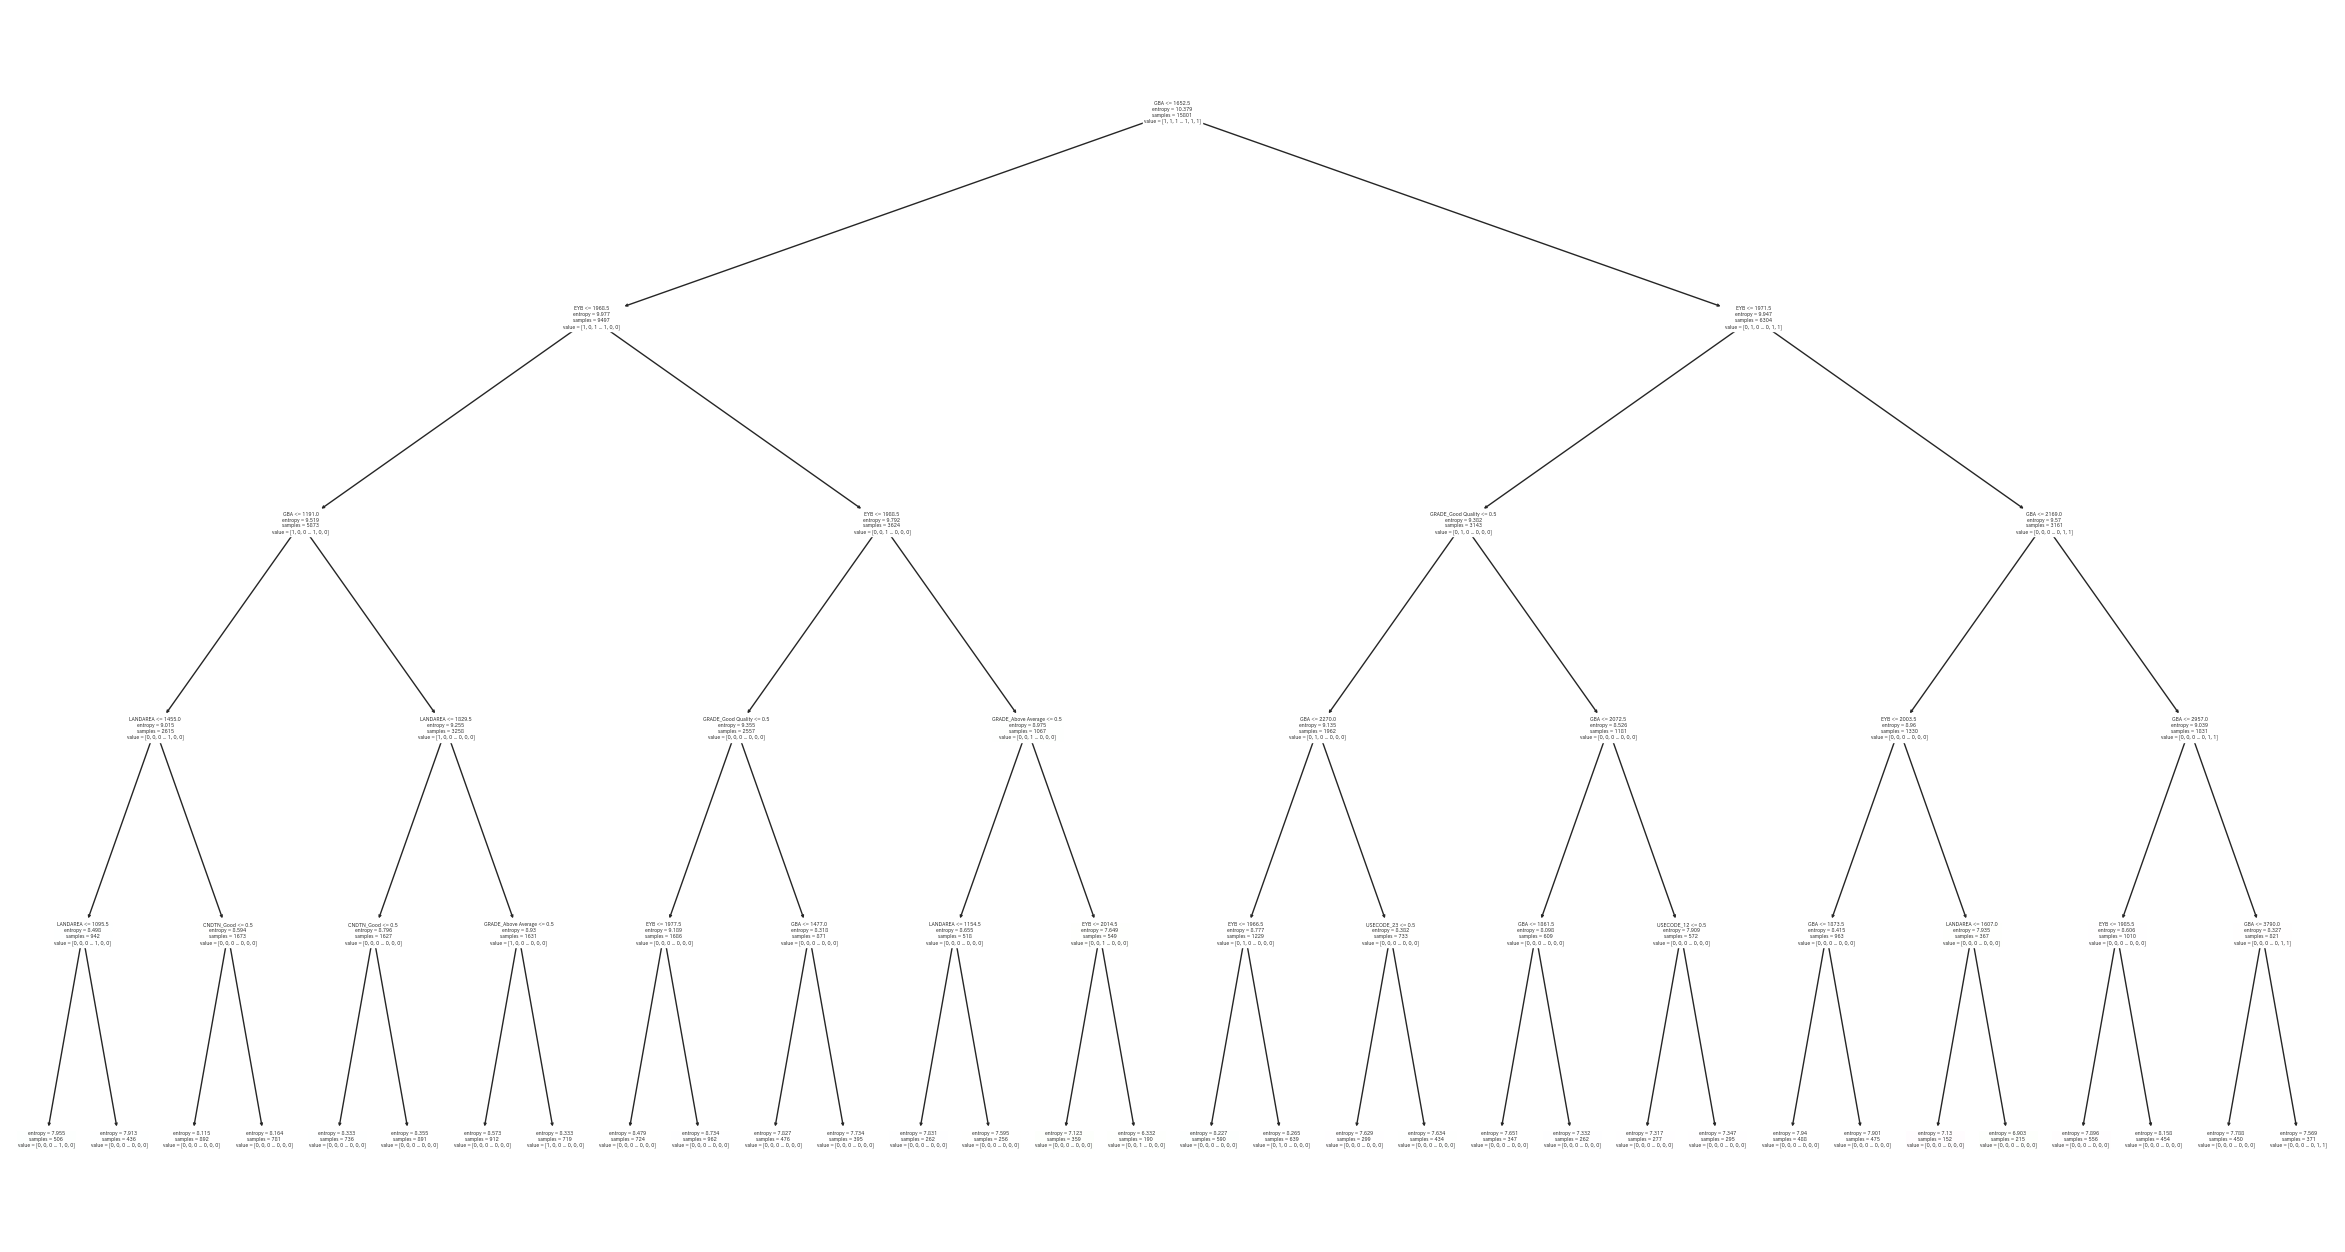

In [ ]:
# scikit-learn 0.21以降から実装された
fig = plt.figure(figsize=(30, 16))
ax = fig.add_subplot()

plot_tree(tree_model, feature_names=col_name, ax=ax, filled=True) #feature_namesのところで、先ほど取り出しておいた 'col_name'を使っています。
plt.show()

In [ ]:
# RMSEを計算するパッケージ

from sklearn.metrics import mean_squared_error
#学習用データのRMSE

y_pred_train = tree_model.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

# # デフォルトだと二乗されたまま（squared=False）
#mean_squared_error(y_train, y_pred_train)

475573.78471187834

In [ ]:
# 検証用データのRMSE

# 説明変数に使う変数の抽出
X_valid = train_valid.copy()
# 'WARD_x' カラムのカテゴリカルバージョンを作成
X_valid["GRADE"] = pd.Categorical(X_valid["GRADE"], categories=categories_GRADE)
X_valid["USECODE"] = pd.Categorical(X_valid["USECODE"], categories=categories_USECODE)
X_valid["CENSUS_TRACT"] = pd.Categorical(X_valid["CENSUS_TRACT"], categories=categories_CENSUS_TRACT)
X_valid["CNDTN"] = pd.Categorical(X_valid["CNDTN"], categories=categories_CNDTN)
# ワンホットエンコーディング
X_valid = pd.get_dummies(X_valid, drop_first=True)

In [ ]:
tree_model = tree_model.fit(X_valid, y_valid)

In [ ]:
y_pred_valid = tree_model.predict(X_valid)

mean_squared_error(y_valid, y_pred_valid, squared=False)

# # デフォルトだと二乗されたまま（squared=False）
#mean_squared_error(y_train, y_pred_train)

545111.4838273491

In [ ]:
X_test = testC.copy()

X_test["WARD_x"] = pd.Categorical(X_test["WARD_x"], categories=categories_WARD_x)
X_test["SALEDATE_m"] = pd.Categorical(X_test["SALEDATE_m"], categories=categories_SALEDATE_m)

# ワンホットエンコーディング
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
y_pred_test = tree_model.predict(X_test)

pred = y_pred_test

In [ ]:
submit2 = df_test[['Id']].copy()
submit2['PRICE'] = pred

ValueError: ignored